In [1]:
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from agents import BasicQLearningAgent, DeepQLearningAgent, Taxi


2024-10-19 14:36:47.102325: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-19 14:36:47.109668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 14:36:47.117434: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-19 14:36:47.119631: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-19 14:36:47.125819: I tensorflow/core/platform/cpu_feature_guar

# [TASK-1] Overview of the Environment.

## Grid

The taxi can move on all nodes except $X$.

For each step it takes, it will be given $-1$ rewards, if successfully deliver passenger $+20$ reward points is granted. On failure on pickup and dropoff $-10$ reward points are granted.

$$
\begin{bmatrix}
\text{RED}_{11} & x_{12} & \text{X} & x_{14} & \text{GREEN}_{15} \\
x_{21} & x_{22} & \text{X} & x_{24} & x_{25} \\
x_{31} & x_{32} & x_{33} & x_{34} & x_{35} \\
x_{41} & \text{X} & x_{43} & x_{44} & x_{45} \\
\text{YELLOW}_{51} & \text{X} & x_53 & \text{BLUE}_{54} & x_{55}
\end{bmatrix}
$$

## Actions
0: move south

1: move north

2: move east

3: move west

4: pickup passenger

5: drop off passenger

## Observation space.

The taxi can dropoff passanger on (0)$\text{RED}_{11}$, (1)$\text{GREEN}_{15}$, (2)$\text{YELLOW}_{51}$, (3)$\text{BLUE}_{54}$.
That means that the passanger can be on all these stats, and additionally (4)$\text{in taxi}$.

The grid is **5x5** resulting in **25** different locations for the taxi.

$4_{destinations} * 5_{passanger_locations} * 25_{nodes} = 500_{states}$

In [5]:
basic = BasicQLearningAgent(
    LEARNING_RATE=0.4,
    DISCOUNT_FACTOR=0.6,
    EPSILON=1.0,
    EPSILON_DECAY=0.0001,
    EPSILON_MIN=0.01
)

Taxi.run(basic, n_episodes=1000, is_training=True)
Taxi.run(basic, n_episodes=1000, is_training=False)


/home/jensen/miniconda3/envs/acit4610_4/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/jensen/miniconda3/envs/acit4610_4/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


IndexError: index 1000 is out of bounds for axis 0 with size 1000

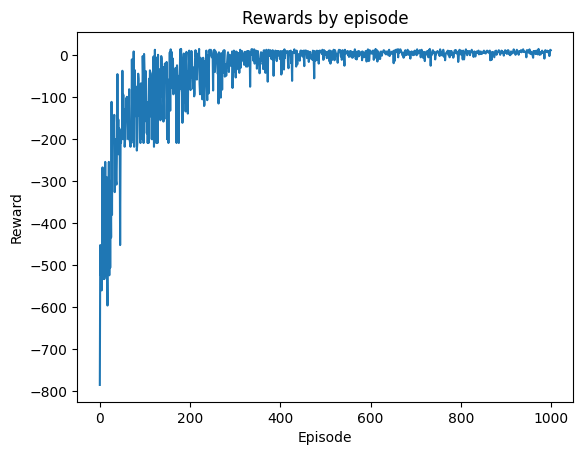

In [3]:
ql = QLearningAgent()
ql.train(
    env = gym.make('Taxi-v3', render_mode=None),
    LEARNING_RATE=0.4,
    DISCOUNT_FACTOR=0.6,
    N_EPISODES=1000,
    EPSILON=1.0,
    EPSILON_DECAY=0.0001,
    EPSILON_MIN=0.01
)